In [1]:
import numpy as np
#from sklearn.datasets import load_iris, load_digits
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

import umap

import sys
sys.path.append('..')
from corr_methods import load_representations
from MCCA import MCCA
import pickle

# Load data

In [2]:
representations_filename_l = [
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/bert_large_cased/ptb_pos_dev.hdf5", 
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/openai_transformer/ptb_pos_dev.hdf5",
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/bert_base_cased/ptb_pos_dev.hdf5",
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/elmo_original/ptb_pos_dev.hdf5",
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/calypso_transformer_6_512_base/ptb_pos_dev.hdf5",
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/elmo_4x4096_512/ptb_pos_dev.hdf5",
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/xlnet_large_cased/ptb_pos_dev.hdf5"
]
layerspec_l = ["all" for x in representations_filename_l]
first_half_only_l = [False for x in representations_filename_l]
second_half_only_l = [False for x in representations_filename_l]
a = load_representations(representations_filename_l, limit=100, layerspec_l=layerspec_l, 
                         first_half_only_l=first_half_only_l, second_half_only_l=second_half_only_l)
num_neurons_d, representations_d = a
# for name in representations_d:
#     print(name, representations_d[name].shape)
# print(representations_d.keys())
# print(list(representations_d.keys())[25])
#print(representations_d['openai_transformer-ptb_pos_dev.hdf5_6'].numpy().flatten().shape)
representations_a = [representations_d[name] for name in representations_d]
# print(type(representations_a[0]), flush=True)
# print(representations_a[0].numpy(), flush=True)
representations_a = [representations.numpy() for representations in representations_a]
print(len(representations_a), flush=True)
print(representations_a[0], flush=True)
print(representations_a[0].shape)
# print(type(representations_a[0]))
# representations_a = np.array(representations_a, dtype='float32')
# print(type(representations_a))
# representations_a

0it [00:00, ?it/s]

bert_large_cased-ptb_pos_dev.hdf5_0 torch.Size([8, 1024])
bert_large_cased-ptb_pos_dev.hdf5_0 torch.Size([33, 1024])
bert_large_cased-ptb_pos_dev.hdf5_0 torch.Size([28, 1024])
bert_large_cased-ptb_pos_dev.hdf5_0 torch.Size([21, 1024])
bert_large_cased-ptb_pos_dev.hdf5_0 torch.Size([19, 1024])
bert_large_cased-ptb_pos_dev.hdf5_1 torch.Size([8, 1024])
bert_large_cased-ptb_pos_dev.hdf5_1 torch.Size([33, 1024])
bert_large_cased-ptb_pos_dev.hdf5_1 torch.Size([28, 1024])
bert_large_cased-ptb_pos_dev.hdf5_1 torch.Size([21, 1024])
bert_large_cased-ptb_pos_dev.hdf5_1 torch.Size([19, 1024])
bert_large_cased-ptb_pos_dev.hdf5_2 torch.Size([8, 1024])
bert_large_cased-ptb_pos_dev.hdf5_2 torch.Size([33, 1024])
bert_large_cased-ptb_pos_dev.hdf5_2 torch.Size([28, 1024])
bert_large_cased-ptb_pos_dev.hdf5_2 torch.Size([21, 1024])
bert_large_cased-ptb_pos_dev.hdf5_2 torch.Size([19, 1024])
bert_large_cased-ptb_pos_dev.hdf5_3 torch.Size([8, 1024])
bert_large_cased-ptb_pos_dev.hdf5_3 torch.Size([33, 1024])
b

1it [00:00,  1.09it/s]

 torch.Size([19, 1024])
bert_large_cased-ptb_pos_dev.hdf5_11 torch.Size([8, 1024])
bert_large_cased-ptb_pos_dev.hdf5_11 torch.Size([33, 1024])
bert_large_cased-ptb_pos_dev.hdf5_11 torch.Size([28, 1024])
bert_large_cased-ptb_pos_dev.hdf5_11 torch.Size([21, 1024])
bert_large_cased-ptb_pos_dev.hdf5_11 torch.Size([19, 1024])
bert_large_cased-ptb_pos_dev.hdf5_12 torch.Size([8, 1024])
bert_large_cased-ptb_pos_dev.hdf5_12 torch.Size([33, 1024])
bert_large_cased-ptb_pos_dev.hdf5_12 torch.Size([28, 1024])
bert_large_cased-ptb_pos_dev.hdf5_12 torch.Size([21, 1024])
bert_large_cased-ptb_pos_dev.hdf5_12 torch.Size([19, 1024])
bert_large_cased-ptb_pos_dev.hdf5_13 torch.Size([8, 1024])
bert_large_cased-ptb_pos_dev.hdf5_13 torch.Size([33, 1024])
bert_large_cased-ptb_pos_dev.hdf5_13 torch.Size([28, 1024])
bert_large_cased-ptb_pos_dev.hdf5_13 torch.Size([21, 1024])
bert_large_cased-ptb_pos_dev.hdf5_13 torch.Size([19, 1024])
bert_large_cased-ptb_pos_dev.hdf5_14 torch.Size([8, 1024])
bert_large_cased-ptb

2it [00:01,  1.31it/s]

openai_transformer-ptb_pos_dev.hdf5_0 torch.Size([33, 768])
openai_transformer-ptb_pos_dev.hdf5_0 torch.Size([28, 768])
openai_transformer-ptb_pos_dev.hdf5_0 torch.Size([21, 768])
openai_transformer-ptb_pos_dev.hdf5_0 torch.Size([19, 768])
openai_transformer-ptb_pos_dev.hdf5_1 torch.Size([8, 768])
openai_transformer-ptb_pos_dev.hdf5_1 torch.Size([33, 768])
openai_transformer-ptb_pos_dev.hdf5_1 torch.Size([28, 768])
openai_transformer-ptb_pos_dev.hdf5_1 torch.Size([21, 768])
openai_transformer-ptb_pos_dev.hdf5_1 torch.Size([19, 768])
openai_transformer-ptb_pos_dev.hdf5_2 torch.Size([8, 768])
openai_transformer-ptb_pos_dev.hdf5_2 torch.Size([33, 768])
openai_transformer-ptb_pos_dev.hdf5_2 torch.Size([28, 768])
openai_transformer-ptb_pos_dev.hdf5_2 torch.Size([21, 768])
openai_transformer-ptb_pos_dev.hdf5_2 torch.Size([19, 768])
openai_transformer-ptb_pos_dev.hdf5_3 torch.Size([8, 768])
openai_transformer-ptb_pos_dev.hdf5_3 torch.Size([33, 768])
openai_transformer-ptb_pos_dev.hdf5_3 torch

3it [00:01,  1.49it/s]

 torch.Size([8, 768])
bert_base_cased-ptb_pos_dev.hdf5_0 torch.Size([33, 768])
bert_base_cased-ptb_pos_dev.hdf5_0 torch.Size([28, 768])
bert_base_cased-ptb_pos_dev.hdf5_0 torch.Size([21, 768])
bert_base_cased-ptb_pos_dev.hdf5_0 torch.Size([19, 768])
bert_base_cased-ptb_pos_dev.hdf5_1 torch.Size([8, 768])
bert_base_cased-ptb_pos_dev.hdf5_1 torch.Size([33, 768])
bert_base_cased-ptb_pos_dev.hdf5_1 torch.Size([28, 768])
bert_base_cased-ptb_pos_dev.hdf5_1 torch.Size([21, 768])
bert_base_cased-ptb_pos_dev.hdf5_1 torch.Size([19, 768])
bert_base_cased-ptb_pos_dev.hdf5_2 torch.Size([8, 768])
bert_base_cased-ptb_pos_dev.hdf5_2 torch.Size([33, 768])
bert_base_cased-ptb_pos_dev.hdf5_2 torch.Size([28, 768])
bert_base_cased-ptb_pos_dev.hdf5_2 torch.Size([21, 768])
bert_base_cased-ptb_pos_dev.hdf5_2 torch.Size([19, 768])
bert_base_cased-ptb_pos_dev.hdf5_3 torch.Size([8, 768])
bert_base_cased-ptb_pos_dev.hdf5_3 torch.Size([33, 768])
bert_base_cased-ptb_pos_dev.hdf5_3 torch.Size([28, 768])
bert_base_ca

4it [00:02,  1.78it/s]

 torch.Size([8, 1024])
elmo_original-ptb_pos_dev.hdf5_0 torch.Size([33, 1024])
elmo_original-ptb_pos_dev.hdf5_0 torch.Size([28, 1024])
elmo_original-ptb_pos_dev.hdf5_0 torch.Size([21, 1024])
elmo_original-ptb_pos_dev.hdf5_0 torch.Size([19, 1024])
elmo_original-ptb_pos_dev.hdf5_1 torch.Size([8, 1024])
elmo_original-ptb_pos_dev.hdf5_1 torch.Size([33, 1024])
elmo_original-ptb_pos_dev.hdf5_1 torch.Size([28, 1024])
elmo_original-ptb_pos_dev.hdf5_1 torch.Size([21, 1024])
elmo_original-ptb_pos_dev.hdf5_1 torch.Size([19, 1024])
elmo_original-ptb_pos_dev.hdf5_2 torch.Size([8, 1024])
elmo_original-ptb_pos_dev.hdf5_2 torch.Size([33, 1024])
elmo_original-ptb_pos_dev.hdf5_2 torch.Size([28, 1024])
elmo_original-ptb_pos_dev.hdf5_2 torch.Size([21, 1024])
elmo_original-ptb_pos_dev.hdf5_2 torch.Size([19, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0

5it [00:02,  1.83it/s]

 torch.Size([8, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0 torch.Size([33, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0 torch.Size([28, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0 torch.Size([21, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0 torch.Size([19, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_1 torch.Size([8, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_1 torch.Size([33, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_1 torch.Size([28, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_1 torch.Size([21, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_1 torch.Size([19, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_2 torch.Size([8, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_2 torch.Size([33, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_2 torch.Size([28, 1024])
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_2 torch.Size([21, 1024])
calypso_transformer_6_512_base

6it [00:02,  2.02it/s]

 torch.Size([8, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_0 torch.Size([33, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_0 torch.Size([28, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_0 torch.Size([21, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_0 torch.Size([19, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_1 torch.Size([8, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_1 torch.Size([33, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_1 torch.Size([28, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_1 torch.Size([21, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_1 torch.Size([19, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_2 torch.Size([8, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_2 torch.Size([33, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_2 torch.Size([28, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_2 torch.Size([21, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_2 torch.Size([19, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_3 torch.Size([8, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_3 torch.Size([33, 1024])
elmo_4x4096_512-ptb_pos_dev.hdf5_3 torch.Size([28, 1

7it [00:03,  1.87it/s]

xlnet_large_cased-ptb_pos_dev.hdf5_0 torch.Size([33, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_0 torch.Size([28, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_0 torch.Size([21, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_0 torch.Size([19, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_1 torch.Size([8, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_1 torch.Size([33, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_1 torch.Size([28, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_1 torch.Size([21, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_1 torch.Size([19, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_2 torch.Size([8, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_2 torch.Size([33, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_2 torch.Size([28, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_2 torch.Size([21, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_2 torch.Size([19, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_3 torch.Size([8, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_3 torch.Size([33, 1024])
xlnet_large_cased-ptb_pos_dev.hdf5_3 torch.

# Run MCCA

In [3]:
# representations_a = representations_a[59:61]
representations_a = representations_a[20:30]
# representations_a = [r[:, :200] for r in representations_a]
print(len(representations_a))
print(representations_a[0].shape)
print(representations_a[0][:3,:3])
num_views = len(representations_a)
print(num_views)
proj_dim = 1
rs = [0.00001]*num_views
print(np.any([np.any(np.isnan(r)) for r in representations_a]))
print(np.any([np.any(np.isinf(r)) for r in representations_a]))
# print('hi')
# for r in representations_a:
#     print(np.any(np.isinf(r)))
print(representations_a[0].shape)
# for i in range(100):
#     for j in range(100):
#         print(representations_a[0][i][j], end=' ')
#     print('')
# sns.heatmap(data=representations_a[0])


10
(100, 1024)
[[ 0.223712 -0.612808  0.101021]
 [-0.741186  0.259642 -0.405524]
 [-0.146192 -0.589938 -0.411777]]
10
False
False
(100, 1024)


In [4]:
# with open('./mcca_args.pkl', 'wb') as f:
#     data_tuple = (num_views, proj_dim, representations_a, rs)
#     pickle.dump(data_tuple, f, -1)

In [5]:
CORR, UU, MM, X_PROJ = MCCA(num_views, proj_dim, representations_a, rs)

In [6]:
print(len(CORR)); print(CORR)
print(len(UU)); print(UU)
print(len(MM)); print(MM)
print(len(X_PROJ)); print(X_PROJ)
print(X_PROJ[0].shape); # print(X_PROJ[1].shape); print(X_PROJ[2].shape)

8960
[ 9.99995303e+00+0.00000000e+00j  9.99992345e+00+0.00000000e+00j
  9.99989608e+00+0.00000000e+00j ... -2.48329904e-15+0.00000000e+00j
 -3.05239670e-15+5.11095352e-16j -3.05239670e-15-5.11095352e-16j]
10
[array([[-0.00613322+0.j],
       [-0.00016373+0.j],
       [ 0.01263374+0.j],
       ...,
       [-0.00430895+0.j],
       [ 0.00154377+0.j],
       [-0.00285409+0.j]]), array([[-0.00880215+0.j],
       [-0.00188139+0.j],
       [ 0.01492784+0.j],
       ...,
       [-0.00440318+0.j],
       [ 0.00041555+0.j],
       [-0.00424655+0.j]]), array([[-0.00313985+0.j],
       [ 0.00167953+0.j],
       [ 0.01680577+0.j],
       ...,
       [-0.00166102+0.j],
       [ 0.0068142 +0.j],
       [ 0.00281607+0.j]]), array([[-0.00638324+0.j],
       [ 0.00537036+0.j],
       [ 0.01926985+0.j],
       ...,
       [ 0.00934686+0.j],
       [-0.00872977+0.j],
       [ 0.00352249+0.j]]), array([[ 0.00767978+0.j],
       [ 0.01068092+0.j],
       [ 0.03097222+0.j],
       ...,
       [-0.00238794+0

# Run UMAP

In [7]:
X_PROJ_flat = np.array([x.real.flatten() for x in X_PROJ])
print(X_PROJ_flat)
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_PROJ_flat)
embedding.shape

[[ 1.03666132  0.57058365  0.25932875 -1.31573356 -0.25061927 -0.99022496
   1.14452053  0.7203567   1.03561585 -0.23302145 -0.98273654 -1.21714787
   1.17999892  0.69654877 -1.7014469   0.73567652  0.61650967 -0.28230909
   1.16913749 -0.24965186 -1.41636139  0.96998531 -1.22414165  1.10921893
  -1.38450929  1.20104491  0.83847744  1.11725128 -0.85853995  0.16380586
   0.91407668  0.90796451 -0.59652063 -1.07579814  1.12192079 -1.15790458
   1.31810965  1.12722902 -1.33163856  1.14429748  0.71137234  1.03561977
  -0.06480974 -0.50617948  0.96163974 -1.03936127 -1.39632658 -1.11054009
  -0.11181847  0.03211399 -0.4232875   1.17630654 -0.40401404  1.31961207
   0.10108181  0.79476236 -0.57390227 -1.57000159  0.12406582  1.14439969
   1.32534811  0.61428978  0.28596058  0.38375665 -0.43871889 -0.55623534
  -1.9361909  -1.01030937  1.14874668  1.03212249  0.7780142  -1.27249657
  -1.35167947  0.96757771 -0.76811491 -1.21626106  0.41285495 -0.84485039
   1.29899126 -0.2496132  -0.52558638 

/usr/users/belinkov/tools/anaconda3/envs/contextual-corr-analysis/lib/python3.6/site-packages/umap/umap_.py:1383: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


(10, 2)

# Plot

{'bert_large_cased': 0, 'openai_transformer': 1}
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
['bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'openai_transformer', 'openai_transformer', 'openai_transformer', 'openai_transformer', 'openai_transformer']
   layer               model          x         y
0     20    bert_large_cased -24.241383  3.171970
1     21    bert_large_cased -23.479696  3.277074
2     22    bert_large_cased -22.877417  5.204675
3     23    bert_large_cased -24.710453  4.724137
4     24    bert_large_cased -23.927248  4.780198
5      0  openai_transformer -23.521042  5.440142
6      1  openai_transformer -22.761755  4.478656
7      2  openai_transformer -24.478783  3.900360
8      3  openai_transformer -22.839056  3.611202
9      4  openai_transformer -23.563515  4.114682


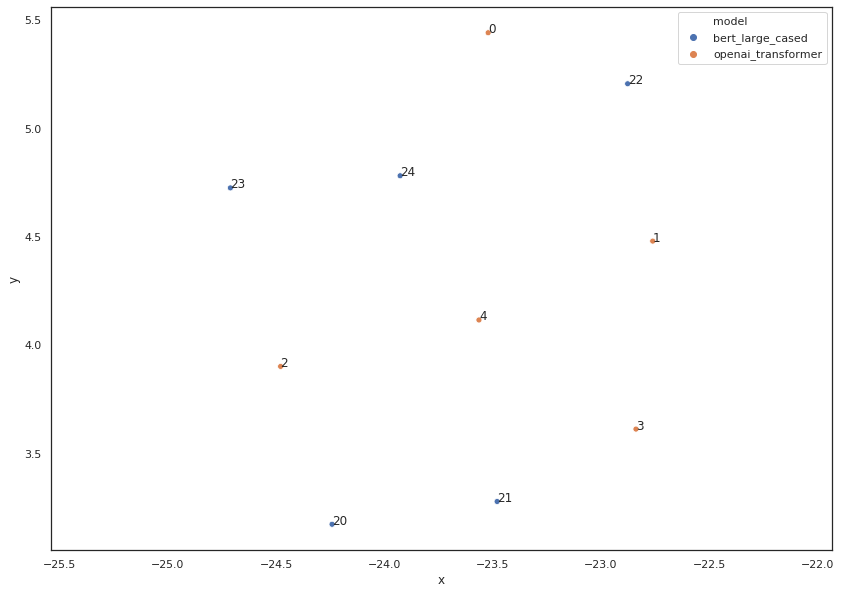

In [8]:
model_names = [name.split('-')[0] for name in representations_d][20:30]
layers = [int(name.split('_')[-1]) for name in representations_d][20:30]
model_names_unique = list(set(model_names))
name_idx_d = dict(zip(model_names_unique, range(len(model_names_unique))))
model_idx = [name_idx_d[name] for name in model_names]
print(name_idx_d)
print(model_idx)
print(model_names)
# print(model_names[59])


df = pd.DataFrame({'layer': layers, 'model': model_names, 
                   'x': embedding[:, 0], 'y': embedding[:, 1]})
print(df)

scatter = sns.scatterplot(x='x', y='y', hue='model', data=df)
for i, layer in enumerate(layers):
    scatter.annotate(layer, (embedding[i, 0], embedding[i, 1]))
#scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in model_idx])
plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of activations', fontsize=24);
